In [20]:
from pysentimiento import create_analyzer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import matplotlib.gridspec as gridspec
import json

In [21]:
tasks = ["emotion", "sentiment", "hate_speech", "irony"]
analyzers = {task: create_analyzer(task=task, lang="es") for task in tasks}

In [22]:
directorio = "../all_pages_clean"
archivos = os.listdir(directorio)
print(len(archivos))

551


In [45]:
labels = {}
labels["emotion"] = ["joy", "sadness", "anger", "fear", "surprise", "disgust", "others"]
labels["sentiment"] = ["NEG", "NEU", "POS"]
labels["irony"] = ["not ironic", "ironic"]
labels["hate_speech"] = ["hateful", "targeted", "aggressive"]

In [24]:
texts = {}
errors = []
for f in archivos:
    try:
        with open(os.path.join(directorio, f), 'r', encoding='utf-8') as file:
            texts[int(f[:4])] = file.read()
    except:
        print(f"Error reading file {f}")
        errors.append(f)

In [25]:
len(errors)

0

In [26]:
results = {}
for f in texts:
    results[f] = {}
    for task in tasks:
        pred = analyzers[task].predict(texts[f])
        probas_redondeadas = {k: round(v, 2) for k, v in pred.probas.items()}
        results[f][task] = probas_redondeadas
        print(f)
        print(pred.output, probas_redondeadas)
        print("\n\n")

12
anger {'others': 0.14, 'joy': 0.0, 'sadness': 0.02, 'anger': 0.75, 'surprise': 0.01, 'disgust': 0.09, 'fear': 0.0}



12
NEG {'NEG': 0.84, 'NEU': 0.14, 'POS': 0.01}



12
[] {'hateful': 0.04, 'targeted': 0.01, 'aggressive': 0.02}



12
not ironic {'not ironic': 1.0, 'ironic': 0.0}



571
others {'others': 0.99, 'joy': 0.0, 'sadness': 0.0, 'anger': 0.0, 'surprise': 0.0, 'disgust': 0.0, 'fear': 0.0}



571
NEU {'NEG': 0.09, 'NEU': 0.86, 'POS': 0.05}



571
[] {'hateful': 0.03, 'targeted': 0.01, 'aggressive': 0.02}



571
not ironic {'not ironic': 0.87, 'ironic': 0.13}



200
others {'others': 0.99, 'joy': 0.0, 'sadness': 0.0, 'anger': 0.0, 'surprise': 0.0, 'disgust': 0.0, 'fear': 0.0}



200
NEU {'NEG': 0.07, 'NEU': 0.81, 'POS': 0.12}



200
[] {'hateful': 0.02, 'targeted': 0.01, 'aggressive': 0.01}



200
not ironic {'not ironic': 0.99, 'ironic': 0.01}



394
others {'others': 0.99, 'joy': 0.0, 'sadness': 0.0, 'anger': 0.0, 'surprise': 0.0, 'disgust': 0.0, 'fear': 0.0}



394
NEU {'N

In [61]:
df = pd.DataFrame.from_dict(results, orient='index')
df.rename_axis('pagina', inplace=True)
df

,emotion,sentiment,hate_speech,irony
pagina,,,,
12,"{'others': 0.14, 'joy': 0.0, 'sadness': 0.02, ...","{'NEG': 0.84, 'NEU': 0.14, 'POS': 0.01}","{'hateful': 0.04, 'targeted': 0.01, 'aggressiv...","{'not ironic': 1.0, 'ironic': 0.0}"
571,"{'others': 0.99, 'joy': 0.0, 'sadness': 0.0, '...","{'NEG': 0.09, 'NEU': 0.86, 'POS': 0.05}","{'hateful': 0.03, 'targeted': 0.01, 'aggressiv...","{'not ironic': 0.87, 'ironic': 0.13}"
200,"{'others': 0.99, 'joy': 0.0, 'sadness': 0.0, '...","{'NEG': 0.07, 'NEU': 0.81, 'POS': 0.12}","{'hateful': 0.02, 'targeted': 0.01, 'aggressiv...","{'not ironic': 0.99, 'ironic': 0.01}"
394,"{'others': 0.99, 'joy': 0.0, 'sadness': 0.0, '...","{'NEG': 0.07, 'NEU': 0.79, 'POS': 0.15}","{'hateful': 0.02, 'targeted': 0.01, 'aggressiv...","{'not ironic': 0.99, 'ironic': 0.01}"
397,"{'others': 0.95, 'joy': 0.0, 'sadness': 0.01, ...","{'NEG': 0.65, 'NEU': 0.32, 'POS': 0.03}","{'hateful': 0.03, 'targeted': 0.01, 'aggressiv...","{'not ironic': 1.0, 'ironic': 0.0}"
...,...,...,...,...
501,"{'others': 0.99, 'joy': 0.01, 'sadness': 0.0, ...","{'NEG': 0.1, 'NEU': 0.76, 'POS': 0.14}","{'hateful': 0.02, 'targeted': 0.01, 'aggressiv...","{'not ironic': 0.92, 'ironic': 0.08}"
9,"{'others': 0.99, 'joy': 0.0, 'sadness': 0.0, '...","{'NEG': 0.17, 'NEU': 0.75, 'POS': 0.09}","{'hateful': 0.02, 'targeted': 0.0, 'aggressive...","{'not ironic': 1.0, 'ironic': 0.0}"
575,"{'others': 0.29, 'joy': 0.0, 'sadness': 0.01, ...","{'NEG': 0.32, 'NEU': 0.65, 'POS': 0.03}","{'hateful': 0.02, 'targeted': 0.0, 'aggressive...","{'not ironic': 0.99, 'ironic': 0.01}"


In [ ]:
'''
for task in tasks:
    for label in labels[task]:
        df[f"{task}_{label}"] = df[task].apply(lambda x: x[label])
df.drop(columns=tasks, inplace=True)
df.to_csv("robertuito_all_results.csv")
'''

,emotion_joy,emotion_sadness,emotion_anger,emotion_fear,emotion_surprise,emotion_disgust,emotion_others,sentiment_NEG,sentiment_NEU,sentiment_POS,hate_speech_hateful,hate_speech_targeted,hate_speech_aggressive,irony_not ironic,irony_ironic
pagina,,,,,,,,,,,,,,,
12,0.00,0.02,0.75,0.0,0.01,0.09,0.14,0.84,0.14,0.01,0.04,0.01,0.02,1.00,0.00
571,0.00,0.00,0.00,0.0,0.00,0.00,0.99,0.09,0.86,0.05,0.03,0.01,0.02,0.87,0.13
200,0.00,0.00,0.00,0.0,0.00,0.00,0.99,0.07,0.81,0.12,0.02,0.01,0.01,0.99,0.01
394,0.00,0.00,0.00,0.0,0.00,0.00,0.99,0.07,0.79,0.15,0.02,0.01,0.02,0.99,0.01
397,0.00,0.01,0.04,0.0,0.00,0.00,0.95,0.65,0.32,0.03,0.03,0.01,0.03,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.01,0.00,0.00,0.0,0.00,0.00,0.99,0.10,0.76,0.14,0.02,0.01,0.01,0.92,0.08
9,0.00,0.00,0.00,0.0,0.00,0.00,0.99,0.17,0.75,0.09,0.02,0.00,0.01,1.00,0.00
575,0.00,0.01,0.64,0.0,0.00,0.05,0.29,0.32,0.65,0.03,0.02,0.00,0.02,0.99,0.01


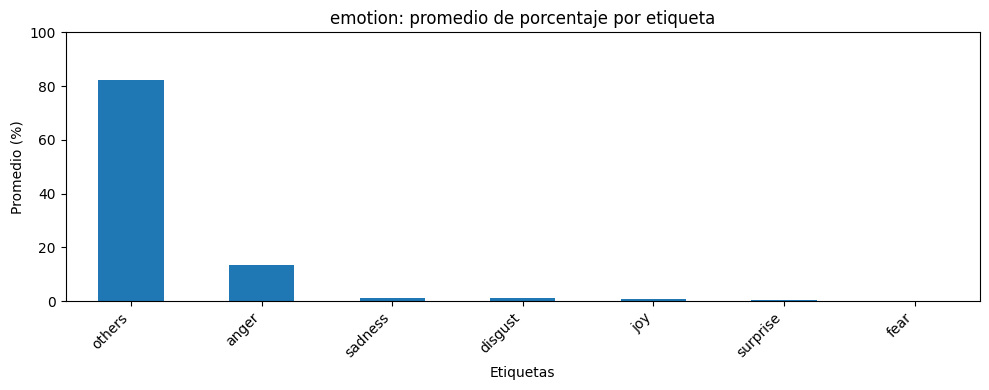

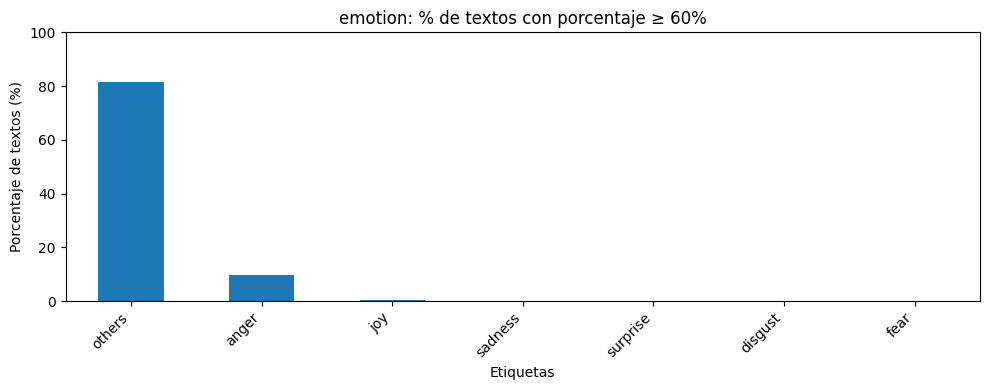

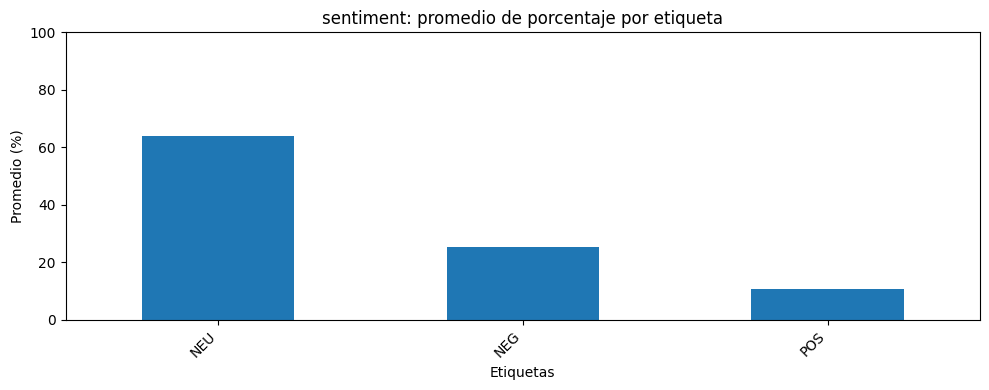

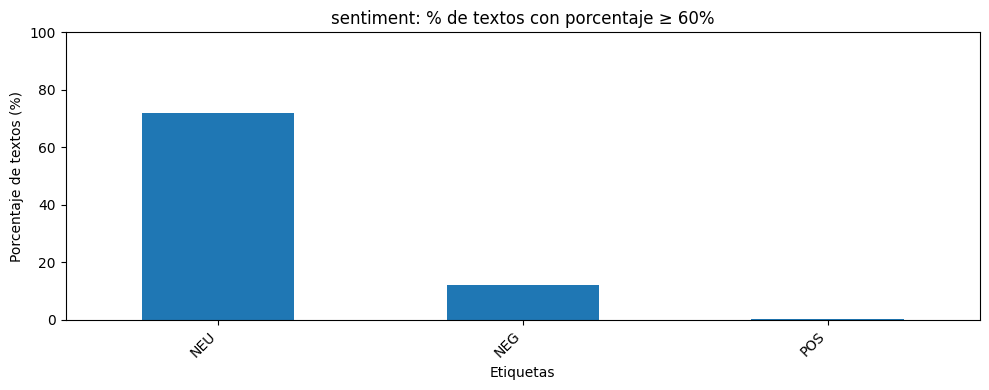

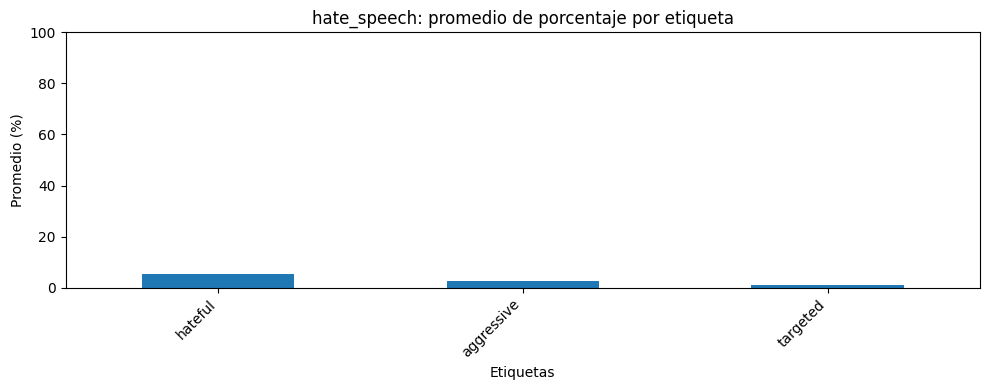

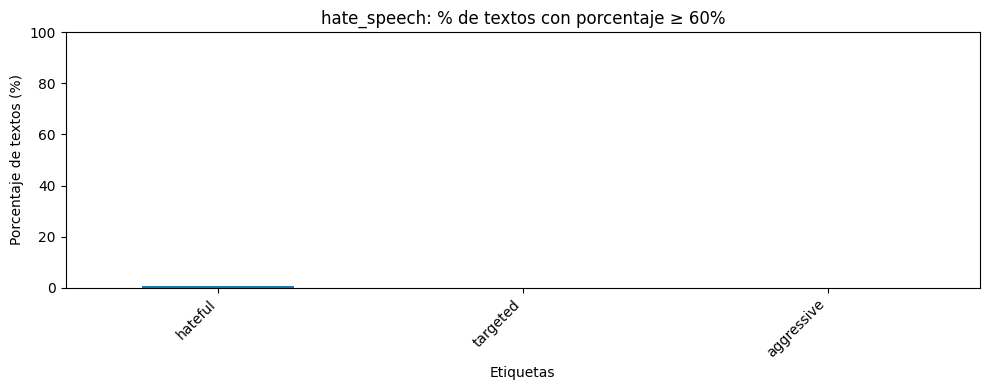

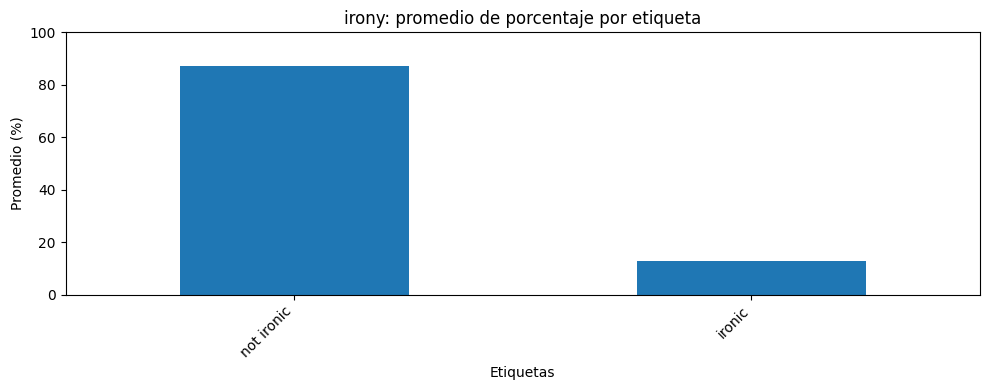

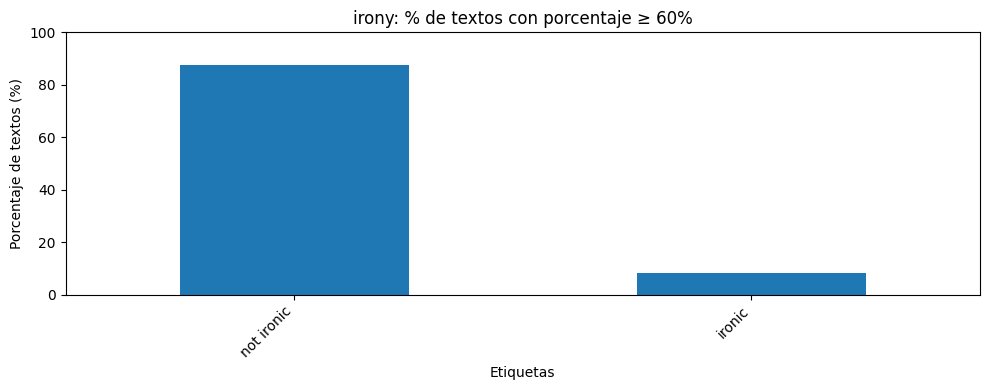

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

threshold = 60  # en porcentaje (0-100)

def plot_task_bars(df_pct: pd.DataFrame, task: str, threshold: float = 60):
  # 1) Promedio por label
  means = df_pct.mean(axis=0).sort_values(ascending=False)

  plt.figure(figsize=(10, 4))
  means.plot(kind="bar")
  plt.title(f"{task}: promedio de porcentaje por etiqueta")
  plt.xlabel("Etiquetas")
  plt.ylabel("Promedio (%)")
  plt.xticks(rotation=45, ha="right")
  plt.ylim(0, 100)
  plt.tight_layout()
  plt.show()

  # 2) % de textos que superan threshold por label
  rate_above = (df_pct >= threshold).mean(axis=0) * 100
  rate_above = rate_above.sort_values(ascending=False)

  plt.figure(figsize=(10, 4))
  rate_above.plot(kind="bar")
  plt.title(f"{task}: % de textos con porcentaje ≥ {threshold}%")
  plt.xlabel("Etiquetas")
  plt.ylabel("Porcentaje de textos (%)")
  plt.xticks(rotation=45, ha="right")
  plt.ylim(0, 100)
  plt.tight_layout()
  plt.show()


# ------------------------------------------------------------
# Construir df por tarea y graficar
# results[f][task] = {label: prob}
# ------------------------------------------------------------
dfs_by_task = {}

for task in tasks:
  # DataFrame: index=archivo, columns=labels
  df = pd.DataFrame.from_dict(
      {f: results[f][task] for f in results},
      orient="index"
  ).fillna(0.0)

  # Asegurar porcentaje (si vienen probas 0-1)
  if df.to_numpy().max() <= 1.0 + 1e-9:
    df_pct = df * 100.0
  else:
    df_pct = df.copy()

  dfs_by_task[task] = df_pct

  # Graficar (2 barras) para esta tarea
  plot_task_bars(df_pct, task=task, threshold=threshold)


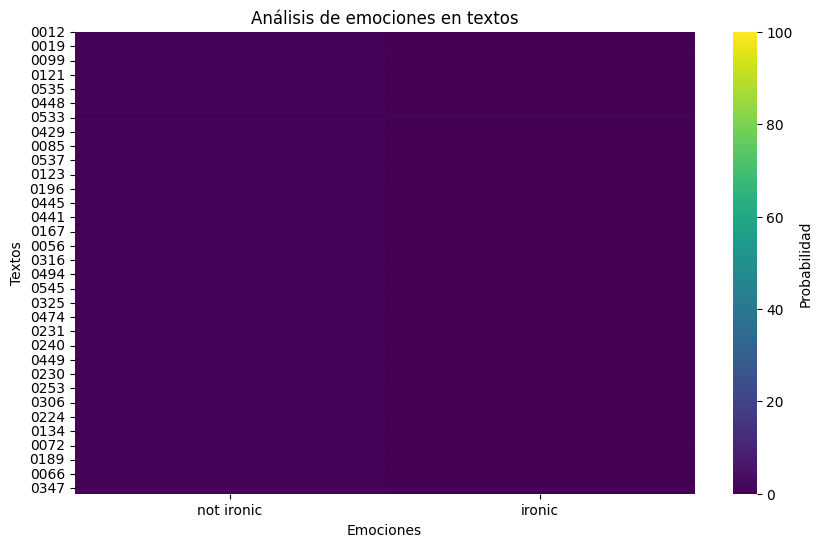

In [ ]:
threshold = 60
annot_x = df.map(lambda x: "X" if x >= threshold else "")

plt.figure(figsize=(10, 6))

ax = sns.heatmap(df, 
                 annot=False,  
                 fmt="", 
                 cmap="viridis", 
                 cbar_kws={'label': 'Probabilidad'}, 
                 vmin=0, vmax=100
                )
plt.title("Análisis de emociones en textos")
plt.xlabel("Emociones")
plt.ylabel("Textos")

for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if df.iloc[i, j] >= threshold:
            ax.text(j + 0.5, i + 0.5, "X", color='white', ha='center', va='center', fontsize=12, fontweight='bold')

plt.show()